In [1]:
from Trainer import Trainer
from Utils import custom_mnist,plot_mnist_eval,generate_classes

import  torch
%reload_ext autoreload
%autoreload 2

#experiences = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]] # one digit a time
experiences = [[0,1,2,3,4,5,6,7,8,9]] # classical offline learning

config = dict(
    device="cuda" if torch.cuda.is_available() else "cpu",
    num_classes=10,
    img_size=32,
    embedding=100,

    n_epochs=20,
    lr_g=0.0002,
    lr_d=0.0002
)

trainer = Trainer(config=config)
history = trainer.fit_bufferReplay(experiences=custom_mnist(experiences = experiences),
                                   batch_size=64,
                                   buff_img=5000)

Dataset found...
Experience --  1 numbers [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|██████████| 938/938 [00:21<00:00, 42.94it/s]


[1/20] Loss_D: 1.1702 Loss_G: 1.3475 Acc 0.781250


100%|██████████| 938/938 [00:19<00:00, 47.01it/s]


[2/20] Loss_D: 1.0704 Loss_G: 1.1525 Acc 0.921875


100%|██████████| 938/938 [00:20<00:00, 46.50it/s]


[3/20] Loss_D: 1.0349 Loss_G: 1.2681 Acc 0.984375


100%|██████████| 938/938 [00:20<00:00, 45.79it/s]


[4/20] Loss_D: 1.0967 Loss_G: 1.2187 Acc 0.968750


100%|██████████| 938/938 [00:20<00:00, 45.05it/s]


[5/20] Loss_D: 1.0096 Loss_G: 1.1990 Acc 0.984375


100%|██████████| 938/938 [00:20<00:00, 45.63it/s]


[6/20] Loss_D: 1.0452 Loss_G: 1.1267 Acc 0.953125


100%|██████████| 938/938 [00:20<00:00, 45.34it/s]


[7/20] Loss_D: 1.0942 Loss_G: 1.0781 Acc 0.953125


100%|██████████| 938/938 [00:20<00:00, 46.33it/s]


[8/20] Loss_D: 1.0573 Loss_G: 1.1048 Acc 1.000000


100%|██████████| 938/938 [00:20<00:00, 45.96it/s]


[9/20] Loss_D: 1.0919 Loss_G: 1.1283 Acc 0.921875


100%|██████████| 938/938 [00:20<00:00, 46.20it/s]


[10/20] Loss_D: 1.1015 Loss_G: 1.1833 Acc 1.000000


100%|██████████| 938/938 [00:20<00:00, 45.49it/s]


[11/20] Loss_D: 1.0816 Loss_G: 1.1303 Acc 1.000000


100%|██████████| 938/938 [00:21<00:00, 43.92it/s]


[12/20] Loss_D: 1.0782 Loss_G: 1.1605 Acc 0.984375


100%|██████████| 938/938 [00:20<00:00, 45.96it/s]


[13/20] Loss_D: 1.1503 Loss_G: 1.0684 Acc 0.968750


100%|██████████| 938/938 [00:20<00:00, 46.14it/s]


[14/20] Loss_D: 1.1176 Loss_G: 1.1440 Acc 0.984375


100%|██████████| 938/938 [00:20<00:00, 45.74it/s]


[15/20] Loss_D: 1.0662 Loss_G: 1.0811 Acc 0.937500


100%|██████████| 938/938 [00:20<00:00, 45.14it/s]


[16/20] Loss_D: 1.1237 Loss_G: 1.1448 Acc 0.984375


100%|██████████| 938/938 [00:20<00:00, 44.67it/s]


[17/20] Loss_D: 1.0602 Loss_G: 1.0650 Acc 0.968750


100%|██████████| 938/938 [00:20<00:00, 45.04it/s]


[18/20] Loss_D: 1.0566 Loss_G: 1.1188 Acc 1.000000


100%|██████████| 938/938 [00:20<00:00, 45.87it/s]


[19/20] Loss_D: 1.0982 Loss_G: 1.0905 Acc 0.968750


100%|██████████| 938/938 [00:20<00:00, 46.03it/s]


[20/20] Loss_D: 1.1048 Loss_G: 1.0592 Acc 0.984375


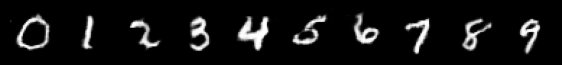

In [2]:
plot_mnist_eval(trainer.eval_progress)

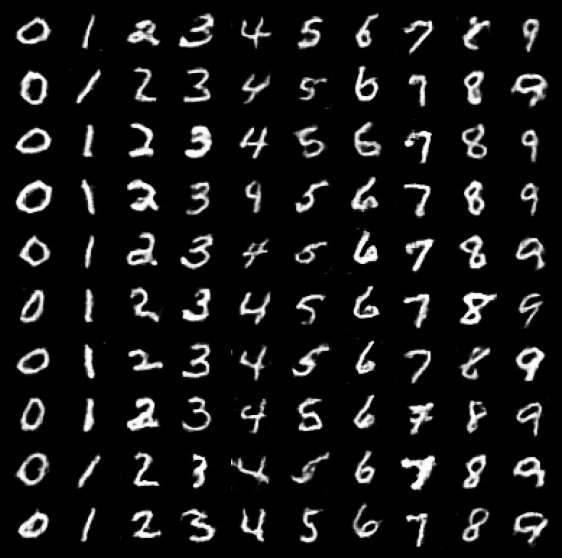

In [3]:
generate_classes(trainer.generator,10, 10, "cuda")